<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/InternshalaML/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction

applications:
1. Customer segmentation
2. doc clustering
3. image segementation
4. search engine results

# evaluation metrics

1. inertia : intra cluster distance(centriod), ideally small value.

    m    k

=   E    E     Wik(||Xi - MUk||)^2

  i = 1  k = 1


  Wik = 1, if Xi belongs to cluster k
      = 0, if not


  MUk is centroid of Xi's cluster(k)

  as inertia only tries to min the intra cluster distance, but it doesnt care about maximse the inter cluster distacne

2. Dunn Index
 
 =min(inter cluster distance)/max(intra cluster distance)



# K MEANS

obj: to min the sum of distances btw the points and their respctive cluster centroid

steps:
1. choose the number of clusters K
2. select k random points from the data as centroids
3. assign all the points to the closest cluster centroid
4. recompute centroids of newly formed cluster
5. repeat 3 , 4

stopping criteria:
1. centroids of newly formed clusters do not change
2. points remains in the same cluster
3. max no of iterations are reached

distance cal:
1. euclidean distance
2. Manhatton distance


as we're dealing with differenct ranges,so scaling/ normalisation
need to be done before clustering

simple explanation: obseravation - mean(var) / ( SD of var)

link:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# implementation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random 

In [0]:
data = pd.read_csv('clustering.csv')
data.shape

(381, 13)

In [0]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [0]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [0]:
data.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,381,376,381,373,381,360,381.000000,381.000000,381.000000,370.000000,351.000000,381,381
unique,381,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002841,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,291,228,234,278,325,NaN,NaN,NaN,NaN,NaN,149,271
mean,NaN,NaN,NaN,NaN,NaN,NaN,3579.845144,1277.275381,104.986877,340.864865,0.837607,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1419.813818,2340.818114,28.358464,68.549257,0.369338,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2600.000000,0.000000,90.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3333.000000,983.000000,110.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4288.000000,2016.000000,127.000000,360.000000,1.000000,NaN,NaN


In [0]:
data.corr

<bound method DataFrame.corr of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001003    Male     Yes  ...            1.0         Rural           N
1    LP001005    Male     Yes  ...            1.0         Urban           Y
2    LP001006    Male     Yes  ...            1.0         Urban           Y
3    LP001008    Male      No  ...            1.0         Urban           Y
4    LP001013    Male     Yes  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
376  LP002953    Male     Yes  ...            1.0         Urban           Y
377  LP002974    Male     Yes  ...            1.0         Rural           Y
378  LP002978  Female      No  ...            1.0         Rural           Y
379  LP002979    Male     Yes  ...            1.0         Rural           Y
380  LP002990  Female      No  ...            0.0     Semiurban           N

[381 rows x 13 columns]>

In [0]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
x = data[['LoanAmount','ApplicantIncome' ]]

No handles with labels found to put in legend.


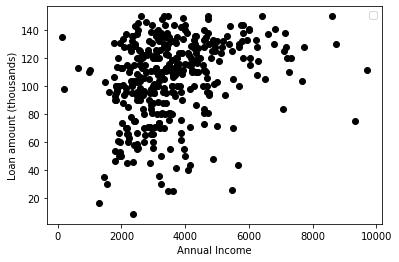

In [0]:
#visulaise data points
plt.scatter(x['ApplicantIncome'], x['LoanAmount'], c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Loan amount (thousands)')
plt.legend()
plt.show()

In [0]:
# step 1 : no of clusters = k
k = 3


No handles with labels found to put in legend.


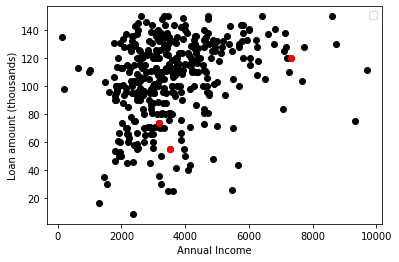

In [0]:
#select random observations as centroids

centroids = (x.sample(n = k))
plt.scatter(x['ApplicantIncome'], x['LoanAmount'], c = 'black')
plt.scatter(centroids['ApplicantIncome'], centroids['LoanAmount'], c = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Loan amount (thousands)')
plt.legend()
plt.show()

In [0]:
#step 2 : assign all the points to the closest cluster centroid
#step 3 : recompute centroids of newly formed clusters
#step 4 : repeat 2, 3

diff = 1
j = 0

In [0]:
while(diff!=0):
    XD=x
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1

    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x["Cluster"]=C
    Centroids_new = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - centroids['ApplicantIncome']).sum()
        print(diff.sum())
    centroids = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
  
 
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-92.65211182411156
-46.4934676023523
-55.03495831127759
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


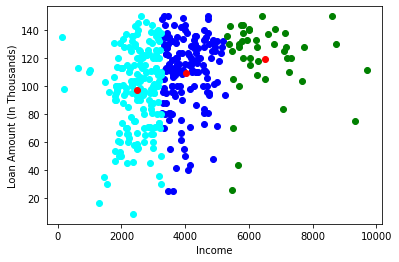

In [0]:
color=['blue','green','cyan']
for k in range(k):
    data=x[x["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# challenges

1. size of cluster are diff,(always tries to make clusters of same shape)
2. Dense clusters
3. random initialization of centroids


sol:
1, 2. increase the no of clusters, later merge nearest cluster for desired cluster
3 . train multiple times and find the approp centroid


* what is opimum no of clusters?

max = each sample as one cluster, no of samples

what if dataset has n no of var how to decide the cluster size

so plot a graph aganist any evaluation metric(inertia /Dunn index) vs clusters

at some point the inertia value will be constant for some no of clusters , we can choose such val as optimum clusters, similarly check the computational complexity


# implementation with student_eval dataset

In [0]:
from sklearn.cluster import KMeans

In [0]:
df = pd.read_csv('student_evaluation.csv')
df.shape

(5820, 33)

In [0]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [0]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [0]:
df.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [0]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [0]:
kmeans = KMeans(n_clusters=3)

In [0]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pred = kmeans.predict(df)
pred

array([0, 0, 1, ..., 1, 2, 2], dtype=int32)

In [0]:
pd.Series(pred).value_counts()

0    2358
1    2229
2    1233
dtype: int64

In [0]:
kmeans.inertia_

180375.76659547855

In [0]:
kmeans.score(df)

-180375.7665954787

In [0]:
SSE = []
for i in range(1, 20):
  kmeans = KMeans( n_jobs = -1, n_clusters= i )
  kmeans.fit(df)
  SSE.append(kmeans.inertia_)

In [0]:
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE' :SSE})

Text(0, 0.5, 'Inertia')

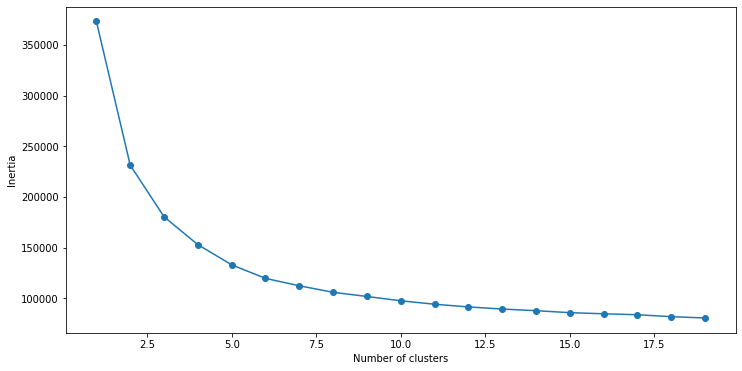

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
frame.head(20)

,Cluster,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.766595
3,4,152888.206441
4,5,133015.589696
5,6,119620.319351
6,7,112340.836957
7,8,105894.282558
8,9,101784.569489
9,10,97529.428577


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pd.DataFrame(data_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [0]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,-1.459981e-14,8.602130e-15,-7.344278e-15,-1.382514e-15,2.960976e-16,1.688760e-15,-1.091681e-15,-2.070890e-16,2.644849e-15,-8.257618e-16,-2.114384e-15,2.001606e-15,-2.075316e-15,1.337990e-15,-3.710892e-15,-5.502281e-16,1.857544e-15,9.385391e-16,-1.196294e-15,1.754076e-15,2.185423e-15,-8.511710e-16,1.865938e-15,-2.832251e-15,1.454354e-16,3.596054e-15,3.714783e-15,1.333717e-15,1.432836e-15,1.561485e-15,2.261345e-15,7.546464e-16,-1.237956e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,-1.645501e+00,-1.615594e+00,-1.591064e+00,-1.707080e+00,-1.639525e+00,-1.685938e+00,-1.559033e+00,-1.774225e+00,-1.825028e+00,-1.825426e+00,-1.684588e+00,-1.892390e+00,-1.736757e+00,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,-8.646760e-01,-8.337248e-01,-8.118657e-01,-9.189468e-01,-8.553341e-01,-9.139351e-01,-7.931366e-01,-9.831431e-01,-2.317387e-01,-2.292753e-01,-9.081325e-01,-3.143815e-01,-9.553171e-01,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,-8.385143e-02,-5.185591e-02,-3.266742e-02,-1.308138e-01,-7.114310e-02,-1.419319e-01,-2.724063e-02,-1.920616e-01,-2.317387e-01,-2.292753e-01,-1.316772e-01,4.746225e-01,-1.738771e-01,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,6.969731e-01,7.300129e-01,7.465309e-01,6.573191e-01,7.130479e-01,6.300713e-01,7.386554e-01,5.990200e-01,5.649058e-01,5.688003e-01,6.447781e-01,4.746225e-01,6.075629e-01,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,1.477798e+00,1.511882e+00,1.525729e+00,1.445452e+00,1.497239e+00,1.402075e+00,1.504551e+00,1.390102e+00,1.361550e+00,1.366876e+00,1.421233e+00,1.263627e+00,1.389003e+00,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


Text(0, 0.5, 'Inertia')

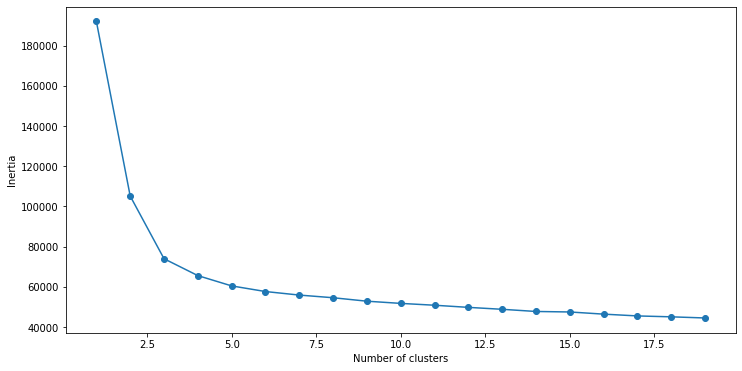

In [0]:
SSE_scaled = []

for i in range(1, 20):
  kmeans = KMeans( n_jobs = -1, n_clusters= i )
  kmeans.fit(data_scaled)
  SSE_scaled.append(kmeans.inertia_)

frame_scaled = pd.DataFrame({'Cluster': range(1, 20), 'SSE_scaled' :SSE_scaled})

plt.figure(figsize=(12, 6))
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE_scaled'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
# the elbow forms btw 2 to 5
#let k = 4
kmeans = KMeans( n_jobs = -1, n_clusters= 4 )
kmeans.fit(data_scaled)
predi = kmeans.predict(data_scaled)
print(predi)

[0 0 3 ... 3 2 2]


In [0]:
frame = pd.DataFrame(data_scaled)
frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0.71607,1.552042,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,0.71607,1.552042,-0.402174,0.897990,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,0.71607,1.552042,-0.402174,-1.136118,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [0]:
frame['cluster'] = predi
frame['cluster'].value_counts()

0    2101
1    1667
2    1196
3     856
Name: cluster, dtype: int64

In [0]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,3
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2


1. Explore more advanced ML algorithms

So far we have covered the basic Machine Learning algorithms like linear regression, logistic regression, kNN, decision trees, and k-means. Then we discussed the advanced ML algorithms like ensemble methods and random forest. 

By this time you would have a good understanding of how these algorithms work. You can now dive deeper into more advanced concepts and algorithms like stacking, blending, and boosting. Below are a couple of links to help you get started:-

a. A comprehensive guide to Ensemble Learning    
b. Math Behind Gradient Boosting Algorithm    
c. Extreme Gradient Boosting Algorithm

2. Working with unstructured data

In this training, we have mostly worked with structured data where we learned how to load, explore and preprocess the data. But in real-world scenarios, you might often come across unstructured data like texts and images. 

So once you are confident at working with the structured data, as a next step you should learn how to work with text and image-based data. This would include learning how to load the data, perform basic preprocessing steps and build a simple model. Here are some important links that you can refer to:- 

Working with Text-based Data

The ultimate guide to deal with Text Data (using Python)
A Comprehensive Guide to Understand and Implement Text Classification in Python

Working with Image Data

Image processing and feature extraction using Python
Build your First Image Classification Model in just 10 Minutes!

3. Participate in online competitions

By the end of the training, you would be familiar with python and you’d have enough technical and statistical skills to participate in competitions on AV’s DataHack platform. This would help you evaluate yourself against fellow ML practitioners. For anyone starting for the first time, I would suggest going through the practice problems first.

4. Build your online Portfolio:

You’ve worked so hard to learn all these new concepts. You should complement all that effort by showcasing your skills. Do as many projects as you can and create a GitHub profile. Here’s a list of some projects you can start with: 24 Ultimate Data Science Projects To Boost Your Knowledge and Skills (& can be accessed freely).


Apart from that, you should also start writing blogs and share your learning with the community. This will not only help you understand the concepts better but the feedback from the community will help you improve. You can start writing on the medium which is an excellent platform for budding authors.

